In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../')
import function
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_origin = pd.read_excel('../VisitorEntrancesV3.xlsx')

In [3]:
df = df_origin[df_origin.Site_Name=='En Gedi']
df = function.remove_unique_one(df)
df = df.drop(df.filter(regex='Season').columns, axis=1)
df = df.drop(df.filter(regex='Exceeded').columns, axis=1)
df = df.drop(df.filter(regex='isHeatwave').columns, axis=1)
df = df.replace({True:1,False:0})

In [4]:
dfWithoutLastYearVisits = df.dropna().drop('last_year_visitors',axis=1)
dfLastYearVisits = df.dropna()

In [5]:
print(dfLastYearVisits.shape)
print(dfWithoutLastYearVisits.shape)

(1002, 8)
(1002, 7)


In [6]:
resTrain,resTest,coeffDf = function.mlrModelResTrainTestCoeff(dfLastYearVisits)

c:\Private\חדש למאמר\Git\nature-reserves-paper\Model MLR\..\function.py:285: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.dropna(inplace=True)


In [7]:
coeffDf

,0
Temperature,-581.86869
IsVacation,-119.93818
is_weekend,-78.52285
pm10,463.86356
IsHoliday,535.19772
last_year_visitors,634.38849


rmse 672.0952430773729
std 719.3264043576573


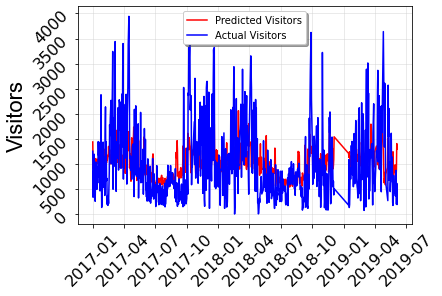

Sample rows:
             Prediction  Actual
Date                           
2018-10-04   835.421825    1132
2019-03-21  1725.983774    1292
2018-09-21   845.755184     505
2018-02-05   980.635538    1107
2018-01-25  1425.642512     146
2018-03-12  1114.635714    2890
2017-07-31   636.260501     213
2018-08-03   616.820429     673
2017-04-17  1421.871372    3196
2018-05-30   916.253554     430

rmse 619.6994520075506
std 690.7782847249603


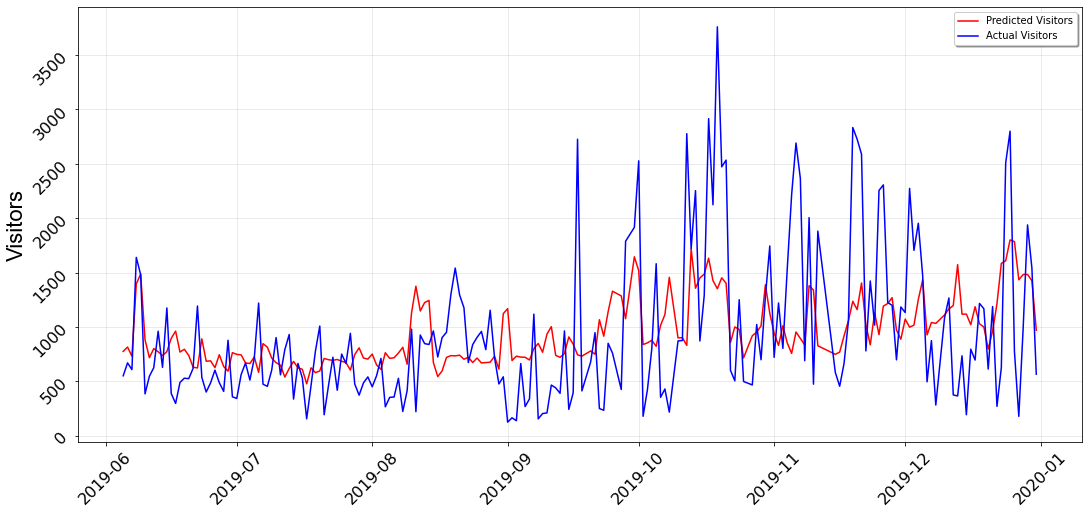

Sample rows:
             Prediction  Actual
Date                           
2019-08-26   668.341385     958
2019-06-17   960.992559     296
2019-07-07   846.119845     473
2019-11-22  1019.987650     779
2019-12-29  1482.270132    1938
2019-08-02   650.177590     551
2019-08-25   713.816597     904
2019-09-05   720.219607     267
2019-06-09  1485.298785    1480
2019-10-11   900.777754     875


In [8]:
function.printRes(resTrain)
print()

function.printRes(resTest)

In [9]:
resTrain,resTest,coeffDf = function.mlrModelResTrainTestCoeff(dfWithoutLastYearVisits)


In [10]:
coeffDf

,0
Temperature,-697.17588
IsVacation,-164.84122
is_weekend,-90.95171
pm10,383.59330
IsHoliday,523.19055


rmse 681.3188067377151
std 719.3264043576573


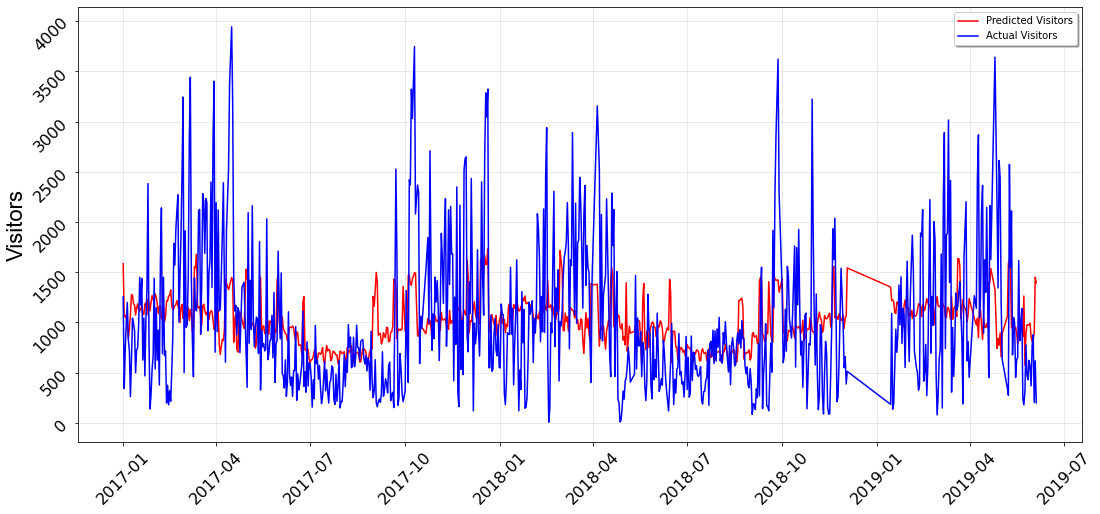

Sample rows:
             Prediction  Actual
Date                           
2017-01-20  1080.635114     626
2017-02-11  1059.344926     717
2018-01-30  1158.440888    1082
2017-11-17   978.696873     419
2018-06-09   821.955783     694
2017-08-03   709.049400     681
2017-06-21   775.342715     396
2018-04-14   915.956613    2231
2018-10-11   967.581272    1054
2017-10-31  1013.366953    1205

rmse 628.7267618560822
std 690.7782847249603


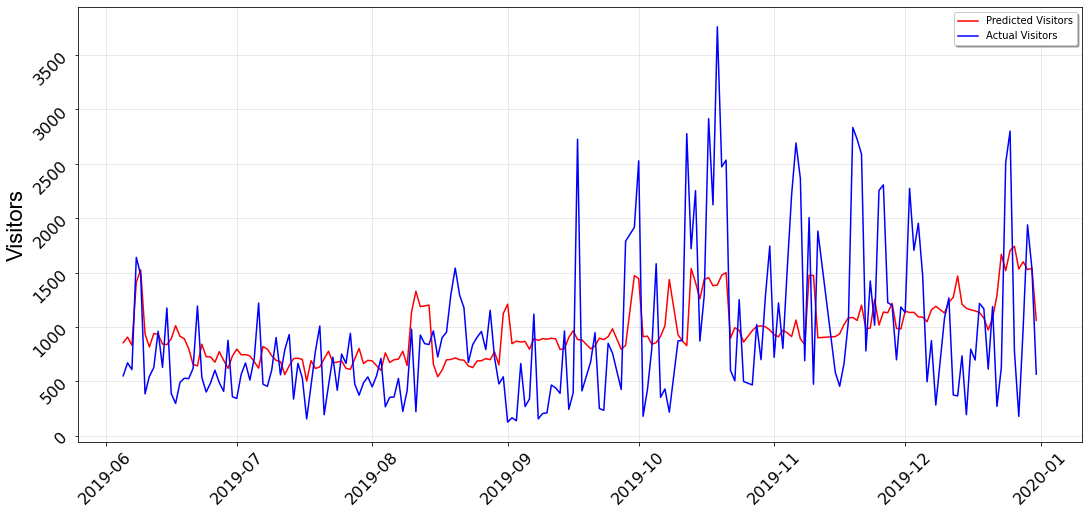

Sample rows:
             Prediction  Actual
Date                           
2019-10-11   870.565552     875
2019-08-02   643.395520     551
2019-09-15   903.806215     241
2019-11-01   928.033718     720
2019-12-29  1526.591463    1938
2019-11-11   900.009660    1881
2019-08-14  1200.717467     838
2019-07-12   561.911897     791
2019-08-20   715.001398    1541
2019-08-29   768.509361     717


In [11]:
function.printRes(resTrain)
print()

function.printRes(resTest)